In [1]:
%matplotlib notebook

In [2]:
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

from kafka import KafkaConsumer


In [3]:
def readFromKafka(topic):
    consumer = KafkaConsumer(topic, 
                             bootstrap_servers="master1:6667", 
                             auto_offset_reset='earliest', 
                             enable_auto_commit=True, 
                             value_deserializer=lambda x: x.decode('utf-8'), 
                             consumer_timeout_ms=10000)

    records = []
    for message in consumer:
        records.append(json.loads(message.value))

    # Normalize timestamp
    df = json_normalize(records)
    base = df["Timestamp"].loc[0:0][0]
    df["Timestamp0"] = (df["Timestamp"] - base)/ 1000.0
    df["SentTimestamp0"] = (df["SentTimestamp"] - base) / 1000.0

    print(f"Records: {len(records)}")
    return df

In [4]:
from matplotlib.ticker import MaxNLocator

def plotComparision(data, height=14):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,figsize=(10,height))

    ax1.scatter( x='Timestamp0', y='ClientID', c='ClientID', data=data, marker='o', alpha=0.5, cmap="tab20")
    ax1.title.set_text('Event Timestamp')

    ax2.scatter( x='SentTimestamp0',y='ClientID', c='ClientID', data=data, marker='o', alpha=0.5, cmap="tab20")
    ax2.title.set_text('Received Timestamp')

    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

## Analyse a 10 session dataset from 10 clients

In [5]:
df = readFromKafka('sessions-10')
df.head()

Records: 255


,ClientID,Data.Errors,Data.Values,ID,Kind,SentTimestamp,SessionID,Timestamp,Timestring,Timestamp0,SentTimestamp0
0,2,0,17,1,m,1540636807746,4517c08a-3b92-426f-9d9d-704a2ba22449,1540636807739,2018-10-27T12:40:07+02:00,0.000,0.007
1,2,1,34,2,m,1540636807769,4517c08a-3b92-426f-9d9d-704a2ba22449,1540636807762,2018-10-27T12:40:07+02:00,0.023,0.030
2,8,0,65,1,m,1540636808324,237a2dcc-809a-4107-b962-5628b6499daa,1540636808323,2018-10-27T12:40:08+02:00,0.584,0.585
3,9,0,79,1,d,1540636811685,183dbe53-688a-4707-ac59-7067f43f7b99,1540636811684,2018-10-27T12:40:11+02:00,3.945,3.946
4,5,0,58,1,m,1540636811707,9acd9c3f-03de-42ec-9e2f-fbfccfcf347c,1540636811698,2018-10-27T12:40:11+02:00,3.959,3.968


### Distribution of session lenghts

<IPython.core.display.Javascript object>


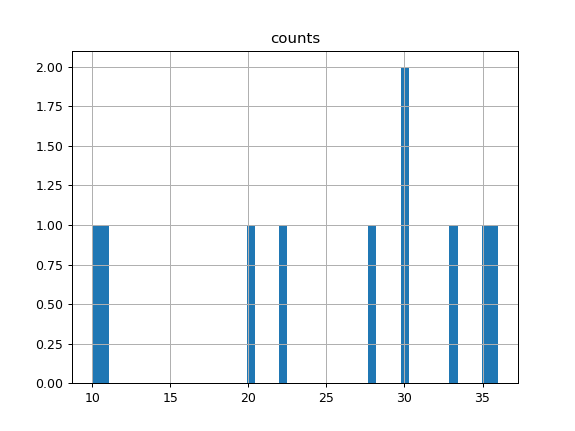

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117dee9b0>]],
      dtype=object)

In [6]:
hist = df.groupby(by="SessionID").size().reset_index(name='counts').sort_values(by="counts")
hist.hist(bins=50)

### Comparison of Event time and Receoved Time

<IPython.core.display.Javascript object>


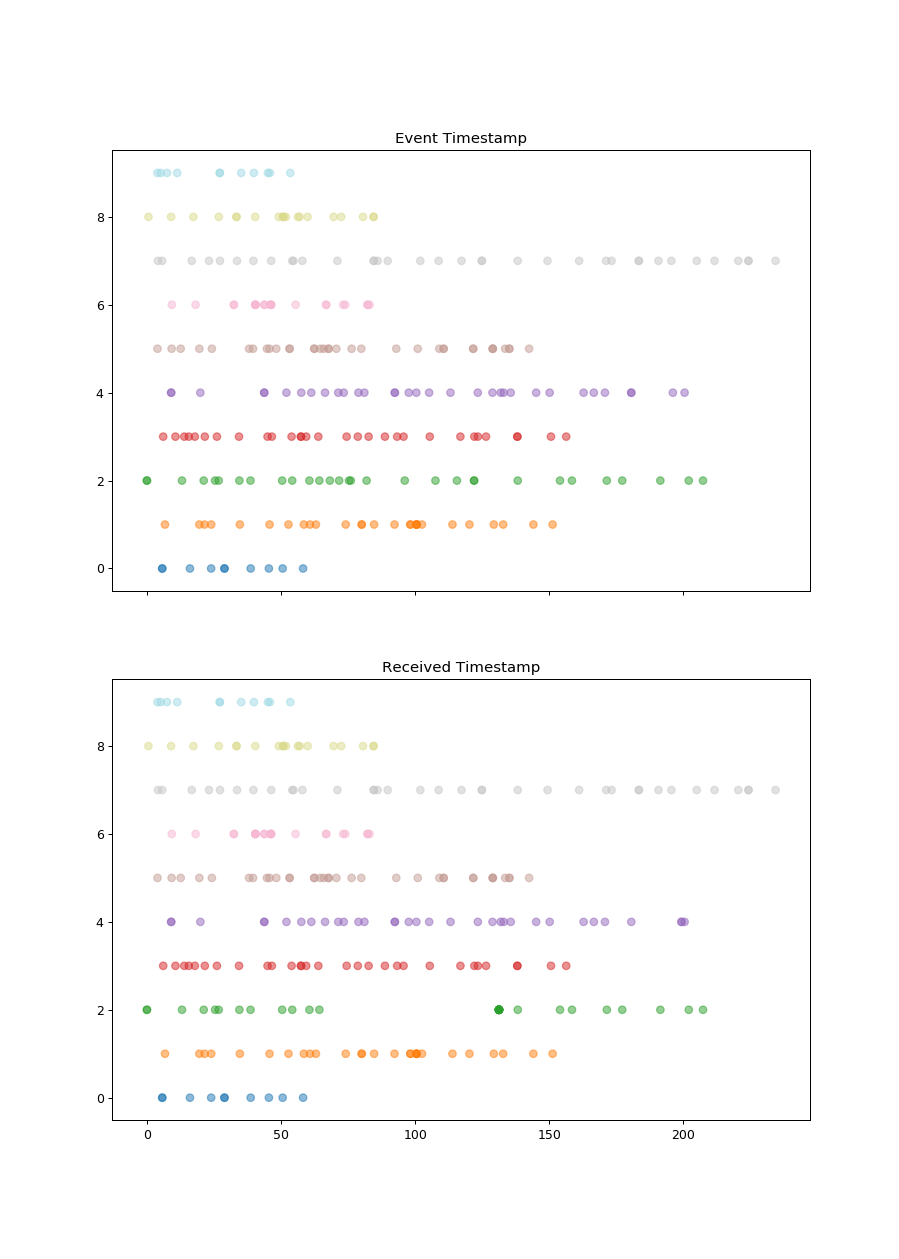

In [7]:
plotComparision(df)

**Session 2 shows a "network outage" after 60 seconds of about 65 seconds**

<IPython.core.display.Javascript object>


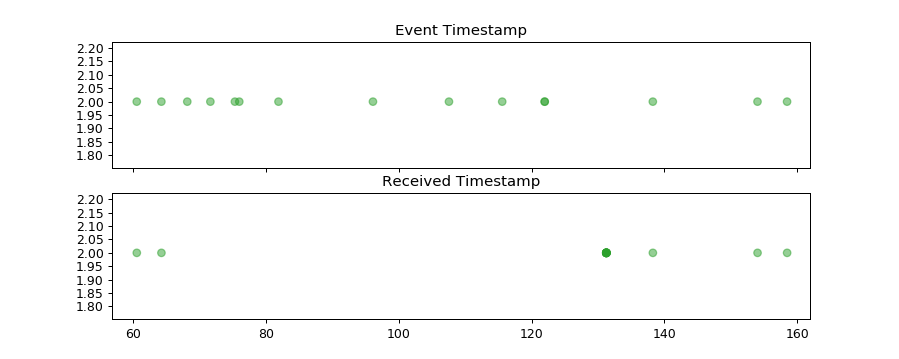

In [8]:
plotComparision(df, 4)

**The data was buffered by the client and sent as fast as possible at about 131.25 sec**

<IPython.core.display.Javascript object>


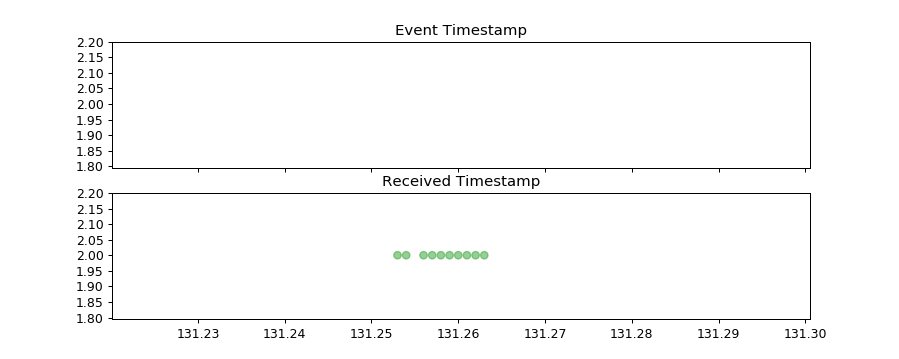

In [9]:
plotComparision(df, 4)

## Analyze a 100 sessions dataset from 10 clients

In [10]:
df = readFromKafka('sessions-100')

Records: 2534


<IPython.core.display.Javascript object>


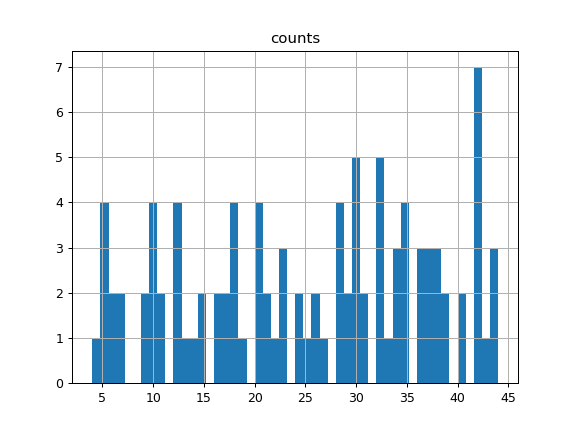

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106bb6908>]],
      dtype=object)

In [11]:
hist = df.groupby(by="SessionID").size().reset_index(name='counts').sort_values(by="counts")
hist.hist(bins=50)

<IPython.core.display.Javascript object>


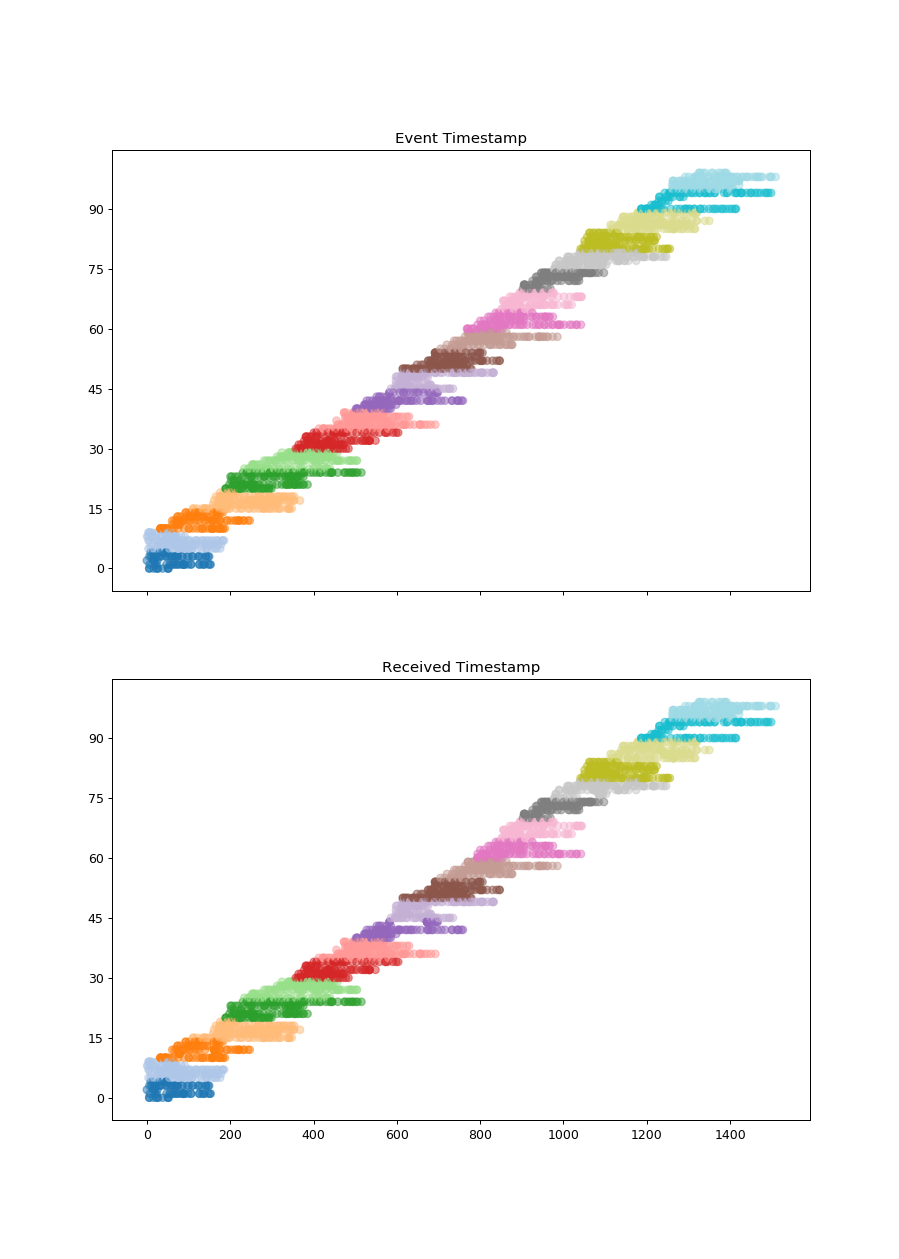

In [12]:
plotComparision(df)